In [1]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as k
import data
import os
import csv
import re
from string import digits

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import clear_output


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 


In [4]:
# Define the text file we want to read
MSFT_Sentiment_FILE = 'Combined_News_DJIA.csv'
file = pd.read_csv('Combined_News_DJIA.csv', sep=',')
print(file.info(verbose = False))
file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Columns: 27 entries, Date to Top25
dtypes: int64(1), object(26)
memory usage: 419.6+ KB
None


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
print(file.columns)
tweet_date = file['Date']
tweet_date.sample(n=5)

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25'],
      dtype='object')


137     2009-02-25
1839    2015-11-27
769     2011-08-26
43      2008-10-09
1388    2014-02-13
Name: Date, dtype: object

In [6]:
# df = pd.DataFrame(np.arange(12).reshape(3,4),
# ...                   columns=['A', 'B', 'C', 'D'])
# df.drop(['A'],axis=1)
tweet_date_ar = np.array(tweet_date)
tweet_text = file.drop(['Date', 'Label'], axis=1)
text_label = tweet_text.columns
print(text_label)

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')


In [7]:
#Set all nan -> '0'
def set_nan_0(tweet_df_col):
    for i in range(tweet_df_col.shape[0]):
        if isinstance(tweet_df_col[i], float):
            tweet_df_col[i] = '0'
    return tweet_df_col

for top in text_label:
    tweet_text[top] = set_nan_0(tweet_text[top])

In [8]:
w = tweet_text['Top1'][0]; print(w)
w = re.sub(r'b+', '', w); print(w)
print(w.split())

b"Georgia 'downs two Russian warplanes' as countries move to brink of war"
"Georgia 'downs two Russian warplanes' as countries move to rink of war"
['"Georgia', "'downs", 'two', 'Russian', "warplanes'", 'as', 'countries', 'move', 'to', 'rink', 'of', 'war"']


In [9]:
text_clear_b = {}
# for date in range(len(tweet_date_ar)):
#     text_clear_b[tweet_date_ar[date]] = []
    
for date in range(len(tweet_date_ar)):
    sum_top = []
    for top in text_label:
        temp_s = tweet_text[top][date]
        temp_split = re.sub(r'b+', '', temp_s).split()
#         print(temp_s)
        sum_top += (temp_split)
    text_clear_b[tweet_date_ar[date]]=sum_top
    print(tweet_date_ar[date])
clear_output()
print('Done!')

Done!


In [10]:
text_clear_b.keys()

dict_keys(['2008-08-08', '2008-08-11', '2008-08-12', '2008-08-13', '2008-08-14', '2008-08-15', '2008-08-18', '2008-08-19', '2008-08-20', '2008-08-21', '2008-08-22', '2008-08-25', '2008-08-26', '2008-08-27', '2008-08-28', '2008-08-29', '2008-09-02', '2008-09-03', '2008-09-04', '2008-09-05', '2008-09-08', '2008-09-09', '2008-09-10', '2008-09-11', '2008-09-12', '2008-09-15', '2008-09-16', '2008-09-17', '2008-09-18', '2008-09-19', '2008-09-22', '2008-09-23', '2008-09-24', '2008-09-25', '2008-09-26', '2008-09-29', '2008-09-30', '2008-10-01', '2008-10-02', '2008-10-03', '2008-10-06', '2008-10-07', '2008-10-08', '2008-10-09', '2008-10-10', '2008-10-13', '2008-10-14', '2008-10-15', '2008-10-16', '2008-10-17', '2008-10-20', '2008-10-21', '2008-10-22', '2008-10-23', '2008-10-24', '2008-10-27', '2008-10-28', '2008-10-29', '2008-10-30', '2008-10-31', '2008-11-03', '2008-11-04', '2008-11-05', '2008-11-06', '2008-11-07', '2008-11-10', '2008-11-11', '2008-11-12', '2008-11-13', '2008-11-14', '2008-11-

In [32]:
print(len(text_clear_b.items()))
print(len(text_clear_b['2008-08-08']))
print((text_clear_b['2008-08-11'][:5]))
tweet_text_dict = text_clear_b

1989
374
["'Why", 'wont', 'America', 'and', 'Nato']


In [20]:
#BOW done!

In [23]:
# tweet_text = np.array(text_clear_b)
# tweet_date = np.array(tweet_date)
# print(tweet_text.shape) #A matrix of text
# print(tweet_date.shape) #An array of date
# #Put the tweets into a dict: key=> Date; Val=>Text
# tweet_text_dict = {}
# for date in range(tweet_text.shape[0]):
#     for topic in range(tweet_text.shape[1]):
# #         tweet_text_dict[tweet_date[date]] = tweet_text[date][topic].split()
#         print(tweet_text[date][topic].split())

In [34]:
# first10pairs = {k: tweet_text_dict[k] for k in list(tweet_text_dict)[:10]}
# tweet_text_dict

In [35]:
print(type(first10pairs))
# print(first10pairs)
tweet_token_list = list(tweet_text_dict.values())
tweet_date_list = list(tweet_text_dict.keys())
print(type(tweet_text_dict))
print(type(tweet_token_list))
print(type(tweet_date_list))

<class 'dict'>
<class 'dict'>
<class 'list'>
<class 'list'>


In [36]:
tweet_date_list

['2008-08-08',
 '2008-08-11',
 '2008-08-12',
 '2008-08-13',
 '2008-08-14',
 '2008-08-15',
 '2008-08-18',
 '2008-08-19',
 '2008-08-20',
 '2008-08-21',
 '2008-08-22',
 '2008-08-25',
 '2008-08-26',
 '2008-08-27',
 '2008-08-28',
 '2008-08-29',
 '2008-09-02',
 '2008-09-03',
 '2008-09-04',
 '2008-09-05',
 '2008-09-08',
 '2008-09-09',
 '2008-09-10',
 '2008-09-11',
 '2008-09-12',
 '2008-09-15',
 '2008-09-16',
 '2008-09-17',
 '2008-09-18',
 '2008-09-19',
 '2008-09-22',
 '2008-09-23',
 '2008-09-24',
 '2008-09-25',
 '2008-09-26',
 '2008-09-29',
 '2008-09-30',
 '2008-10-01',
 '2008-10-02',
 '2008-10-03',
 '2008-10-06',
 '2008-10-07',
 '2008-10-08',
 '2008-10-09',
 '2008-10-10',
 '2008-10-13',
 '2008-10-14',
 '2008-10-15',
 '2008-10-16',
 '2008-10-17',
 '2008-10-20',
 '2008-10-21',
 '2008-10-22',
 '2008-10-23',
 '2008-10-24',
 '2008-10-27',
 '2008-10-28',
 '2008-10-29',
 '2008-10-30',
 '2008-10-31',
 '2008-11-03',
 '2008-11-04',
 '2008-11-05',
 '2008-11-06',
 '2008-11-07',
 '2008-11-10',
 '2008-11-

In [42]:
stop_words = set(stopwords.words('english'))
remove_digits = str.maketrans('', '', digits)

def stopword_filter(word_tokens):
    """
    Remove stop words and links
    """
    filtered_sentence = []
    
    for w in word_tokens: 
        w = w.translate(remove_digits)
        w = re.sub(r'http\S+', '', w)
        w = re.sub('[^A-Za-z0-9]+', '', w)
        if w not in stop_words and w != '': 
            filtered_sentence.append(w) 
        
    return filtered_sentence

def english_filter(word_tokens):
    """
    Remove words
    """
    filtered_sentence = []
    w = word_tokens
    w = re.sub(r'#\S+', '', w)
    w = re.sub('[^/0-9]+', '', w)
    filtered_sentence.append(w) 
        
    return filtered_sentence

def date_filter(word_tokens):
    """
    Remove words
    """
    filtered_sentence = []
    w = word_tokens
    w = re.sub('-', '/', w)
    filtered_sentence.append(w) 
        
    return filtered_sentence

In [43]:
tweet_token_list_fil_1 = []
for i in range(len(tweet_token_list)):
    tweet_token_list_fil_1.append(stopword_filter(tweet_token_list[i]))
    

In [44]:
for i in range(len(tweet_date_list)):
    tweet_date_list[i] = tweet_date_list[i].split()[0]
print(len(tweet_date_list)); print(len(tweet_token_list_fil_1))

1989
1989


In [45]:
tweet_date_list_fil_1 = []
for i in range(len(tweet_date_list)):
    tweet_date_list_fil_1 += (date_filter(tweet_date_list[i]))
print(len(tweet_date_list_fil_1)); print(len(tweet_token_list_fil_1))


1989
1989


In [47]:
tweet_date_list_fil_1[:5]

['2008/08/08', '2008/08/11', '2008/08/12', '2008/08/13', '2008/08/14']

In [48]:
new_dict = {}

for i in range(len(tweet_date_list)):
    new_dict[tweet_date_list_fil_1[i]] = []

for i in range(len(tweet_date_list)):
    new_dict[tweet_date_list_fil_1[i]] += tweet_token_list_fil_1[i]


In [52]:
new_dict.keys()

dict_keys(['2008/08/08', '2008/08/11', '2008/08/12', '2008/08/13', '2008/08/14', '2008/08/15', '2008/08/18', '2008/08/19', '2008/08/20', '2008/08/21', '2008/08/22', '2008/08/25', '2008/08/26', '2008/08/27', '2008/08/28', '2008/08/29', '2008/09/02', '2008/09/03', '2008/09/04', '2008/09/05', '2008/09/08', '2008/09/09', '2008/09/10', '2008/09/11', '2008/09/12', '2008/09/15', '2008/09/16', '2008/09/17', '2008/09/18', '2008/09/19', '2008/09/22', '2008/09/23', '2008/09/24', '2008/09/25', '2008/09/26', '2008/09/29', '2008/09/30', '2008/10/01', '2008/10/02', '2008/10/03', '2008/10/06', '2008/10/07', '2008/10/08', '2008/10/09', '2008/10/10', '2008/10/13', '2008/10/14', '2008/10/15', '2008/10/16', '2008/10/17', '2008/10/20', '2008/10/21', '2008/10/22', '2008/10/23', '2008/10/24', '2008/10/27', '2008/10/28', '2008/10/29', '2008/10/30', '2008/10/31', '2008/11/03', '2008/11/04', '2008/11/05', '2008/11/06', '2008/11/07', '2008/11/10', '2008/11/11', '2008/11/12', '2008/11/13', '2008/11/14', '2008/11/

In [53]:
terms_volume = {}

for key in new_dict.keys():
    terms_volume[key] = len(new_dict[key])



In [65]:
# terms_volume.keys()


In [114]:
vol_1 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i < len(terms_volume)/8}
vol_2 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)*1/8 and i < len(terms_volume)/4}
vol_3 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)/4 and i < len(terms_volume)*3/8}
vol_4 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)*3/8 and i < len(terms_volume)/2}
vol_5 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)/2 and i < len(terms_volume)*5/8}
vol_6 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)*5/8 and i < len(terms_volume)*3/4}
vol_7 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)*3/4 and i < len(terms_volume)*7/8}
vol_8 = {key: terms_volume[key] for i, (key, value) in enumerate(terms_volume.items()) if i >= len(terms_volume)*7/8}



In [119]:
# print(vol_1.keys())
xtick_set_1 = range(0, len(vol_1.keys()))
xtick_set_2 = range(len(vol_1.keys()), 2*len(vol_2.keys()))
xtick_set_3 = range(len(vol_1.keys())*2, 3*len(vol_2.keys())-1)
xtick_set_4 = range(len(vol_1.keys())*3, 4*len(vol_2.keys()))
xtick_set_5 = range(len(vol_1.keys())*4, 5*len(vol_2.keys()))
xtick_set_6 = range(len(vol_1.keys())*5, 6*len(vol_2.keys())-1)
xtick_set_7 = range(len(vol_1.keys())*6, 7*len(vol_2.keys()))
xtick_set_8 = range(len(vol_1.keys())*7, 8*len(vol_2.keys())-1)

In [120]:
print(len(xtick_set_3))
print(len(vol_3))

248
248


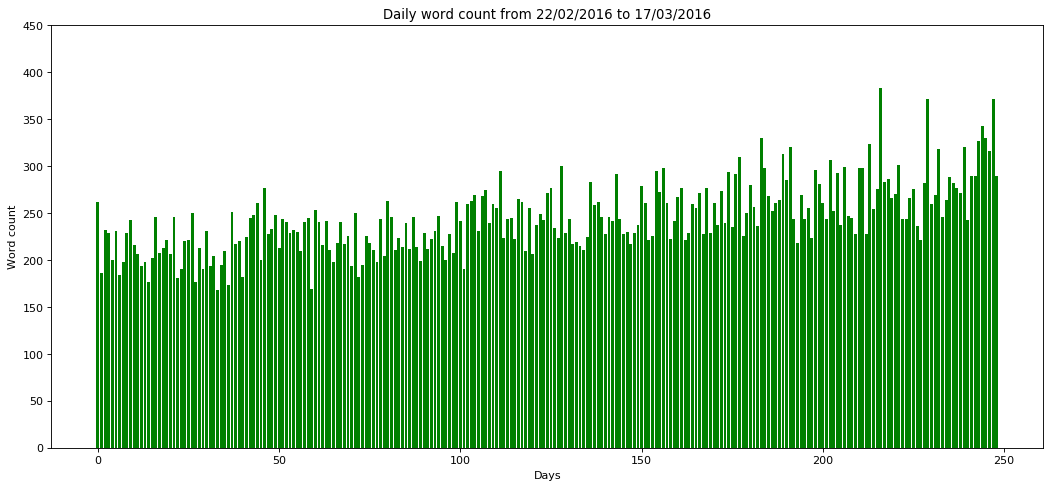

In [128]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(xtick_set_1, vol_1.values(), color='g', width = 0.8, align = 'center')
# plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 500, step = 50))
plt.xlabel('Days')
plt.ylabel('Word count')
plt.title('Daily word count from 22/02/2016 to 17/03/2016')
plt.savefig('8y_date_volumne1.pdf')

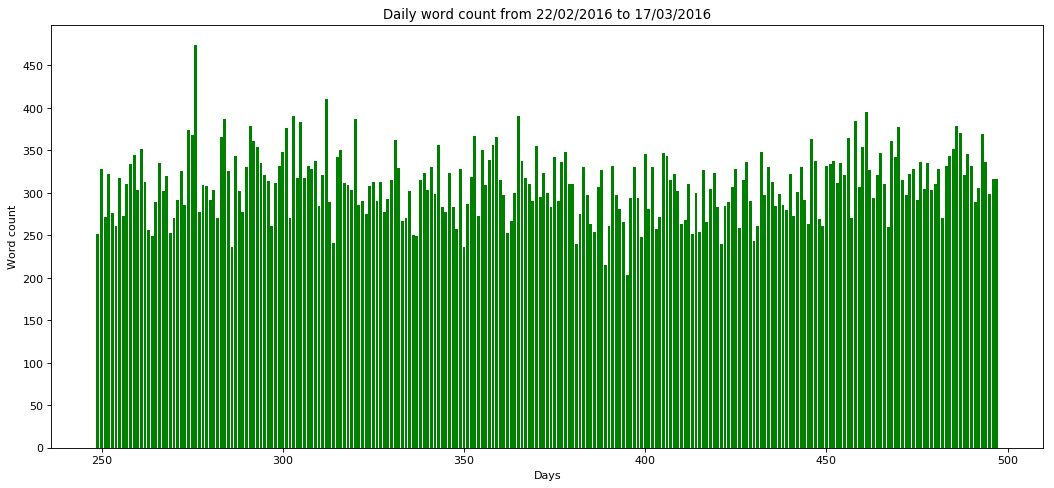

In [129]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(xtick_set_2, vol_2.values(), color='g', width = 0.8, align = 'center')
# plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 500, step = 50))
plt.xlabel('Days')
plt.ylabel('Word count')
plt.title('Daily word count from 22/02/2016 to 17/03/2016')
plt.savefig('8y_date_volumne2.pdf')

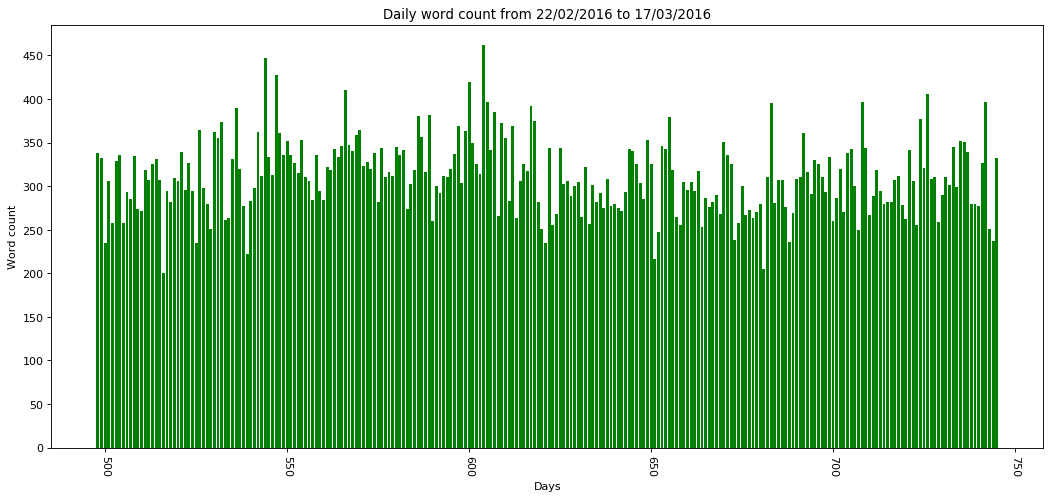

In [130]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(xtick_set_3, vol_3.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 500, step = 50))
plt.xlabel('Days')
plt.ylabel('Word count')
plt.title('Daily word count from 22/02/2016 to 17/03/2016')
plt.savefig('8y_date_volumne3.pdf')

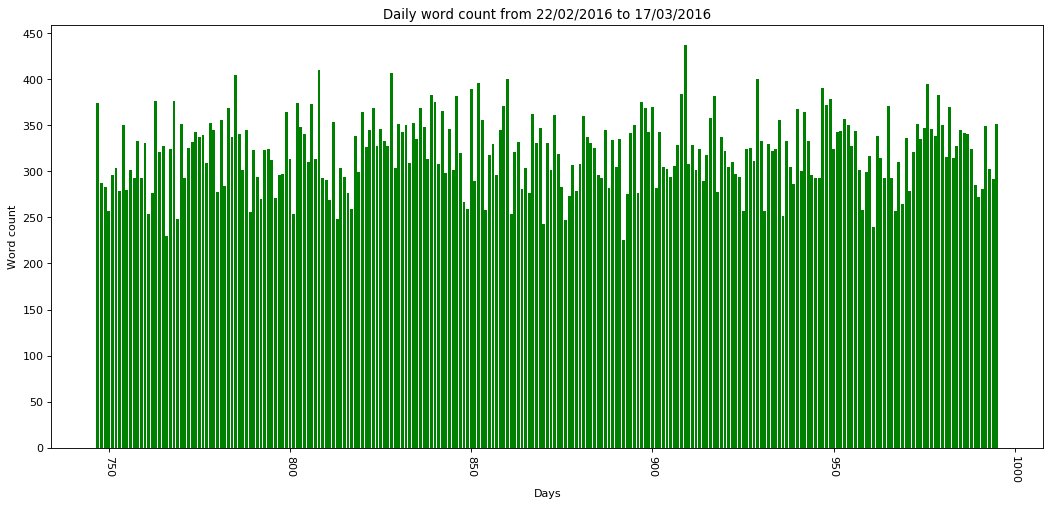

In [131]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(xtick_set_4, vol_4.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 500, step = 50))
plt.xlabel('Days')
plt.ylabel('Word count')
plt.title('Daily word count from 22/02/2016 to 17/03/2016')
plt.savefig('8y_date_volumne4.pdf')

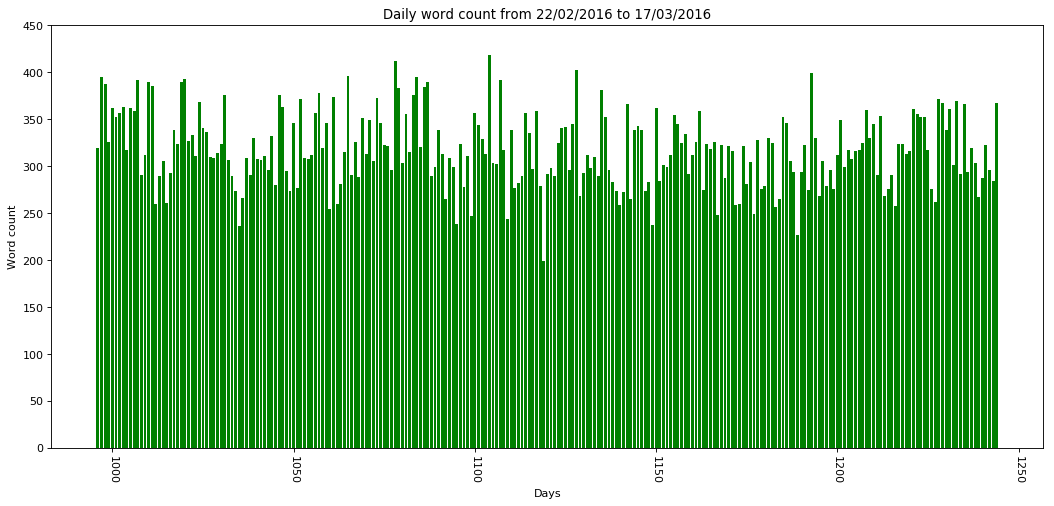

In [132]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(xtick_set_5, vol_5.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 500, step = 50))
plt.xlabel('Days')
plt.ylabel('Word count')
plt.title('Daily word count from 22/02/2016 to 17/03/2016')
plt.savefig('8y_date_volumne5.pdf')

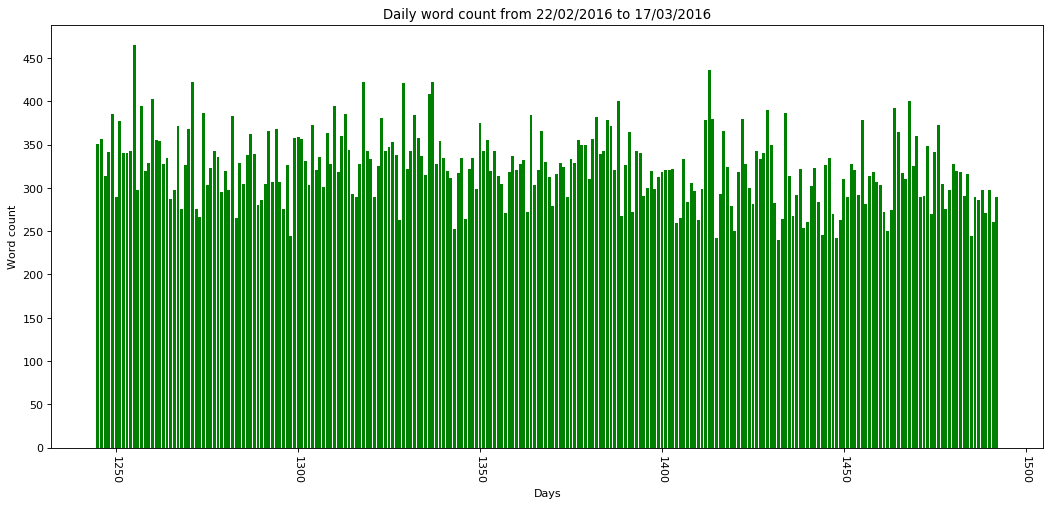

In [133]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(xtick_set_6, vol_6.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 500, step = 50))
plt.xlabel('Days')
plt.ylabel('Word count')
plt.title('Daily word count from 22/02/2016 to 17/03/2016')
plt.savefig('8y_date_volumne6.pdf')

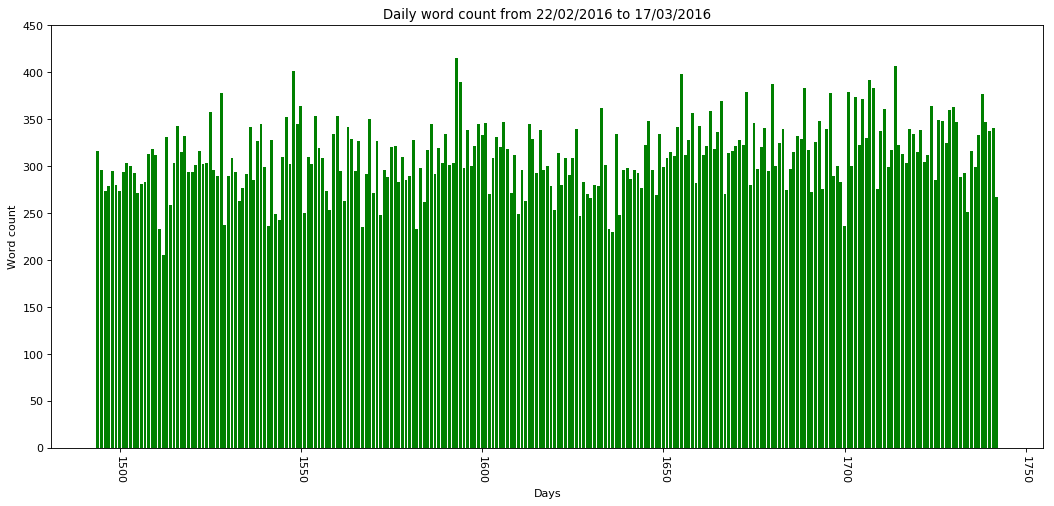

In [134]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(xtick_set_7, vol_7.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 500, step = 50))
plt.xlabel('Days')
plt.ylabel('Word count')
plt.title('Daily word count from 22/02/2016 to 17/03/2016')
plt.savefig('8y_date_volumne7.pdf')

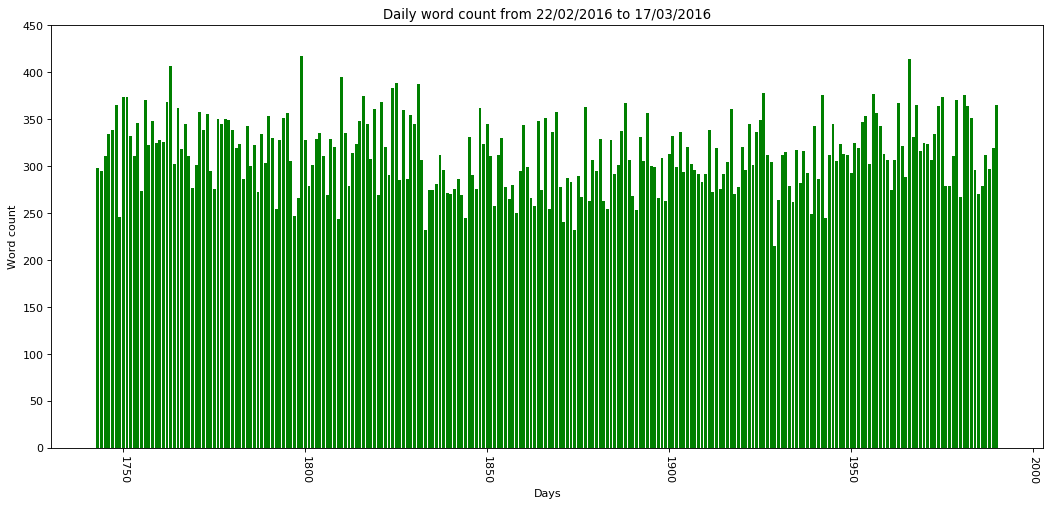

In [135]:
figure(figsize=(16, 7), dpi=80, facecolor='w', edgecolor='k')
barplt_col_sum = plt.bar(xtick_set_8, vol_8.values(), color='g', width = 0.8, align = 'center')
plt.xticks(rotation=-90)
plt.yticks(np.arange(0 , 500, step = 50))
plt.xlabel('Days')
plt.ylabel('Word count')
plt.title('Daily word count from 22/02/2016 to 17/03/2016')
plt.savefig('8y_date_volumne8.pdf')

In [136]:
new_dict.keys()

dict_keys(['2008/08/08', '2008/08/11', '2008/08/12', '2008/08/13', '2008/08/14', '2008/08/15', '2008/08/18', '2008/08/19', '2008/08/20', '2008/08/21', '2008/08/22', '2008/08/25', '2008/08/26', '2008/08/27', '2008/08/28', '2008/08/29', '2008/09/02', '2008/09/03', '2008/09/04', '2008/09/05', '2008/09/08', '2008/09/09', '2008/09/10', '2008/09/11', '2008/09/12', '2008/09/15', '2008/09/16', '2008/09/17', '2008/09/18', '2008/09/19', '2008/09/22', '2008/09/23', '2008/09/24', '2008/09/25', '2008/09/26', '2008/09/29', '2008/09/30', '2008/10/01', '2008/10/02', '2008/10/03', '2008/10/06', '2008/10/07', '2008/10/08', '2008/10/09', '2008/10/10', '2008/10/13', '2008/10/14', '2008/10/15', '2008/10/16', '2008/10/17', '2008/10/20', '2008/10/21', '2008/10/22', '2008/10/23', '2008/10/24', '2008/10/27', '2008/10/28', '2008/10/29', '2008/10/30', '2008/10/31', '2008/11/03', '2008/11/04', '2008/11/05', '2008/11/06', '2008/11/07', '2008/11/10', '2008/11/11', '2008/11/12', '2008/11/13', '2008/11/14', '2008/11/

In [137]:
new_pd =  pd.DataFrame({k: pd.Series(l) for k, l in new_dict.items()})

In [138]:
print(new_pd.shape)

(474, 1989)


In [139]:
new_pd.sample(n=5)

,2008/08/08,2008/08/11,2008/08/12,2008/08/13,2008/08/14,2008/08/15,2008/08/18,2008/08/19,2008/08/20,2008/08/21,...,2016/06/20,2016/06/21,2016/06/22,2016/06/23,2016/06/24,2016/06/27,2016/06/28,2016/06/29,2016/06/30,2016/07/01
460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,fifty,reels,police,NaN,NaN,NaN,forces,NaN,victims,killed
69,intervene,World,Russia,announces,South,criticism,Gloal,humanitarian,Europe,Of,...,Prisoners,campaigners,target,A,following,een,Kong,Were,immigrant,killings
234,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,International,...,predict,representative,Los,India,What,MP,worshipers,likened,sentenced,Mass
132,SoRussia,TV,The,cyeralliance,set,een,Vladimir,fine,India,instead,...,Hunger,silenced,record,prospect,UK,gives,aircraft,aggressively,rain,A


In [140]:
new_pd_2 = new_pd.T
print(new_pd_2.shape)
new_pd_2.sample(n=5)

(1989, 474)


,0,1,2,3,4,5,6,7,8,9,...,464,465,466,467,468,469,470,471,472,473
2015/04/13,IKEA,Will,Produce,amp,Ship,FlatPack,Emergency,Shelters,Around,World,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010/12/17,Richard,Stallman,The,actions,MasterCard,Amazon,hacking,People,finding,way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015/07/08,Teen,Guilty,Of,Hacking,PlayStation,Network,A,teenager,helped,ruin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016/05/23,It,keeps,happening,rape,survivor,says,Protests,American,military,presence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015/03/13,German,antivaccer,wagers,anyone,proving,existance,measles,virus,Researcher,sends,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
new_pd.to_csv('8y_clean_msft_tweets_v.csv')
new_pd_2.to_csv('8y_clean_msft_tweets_h.csv')